In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('dataset_allenamento.csv', sep=";")

In [3]:
dataset.replace('5+', 6, inplace = True)
dataset.replace('3+', 4, inplace = True)

In [4]:
dataset.drop(columns='Unnamed: 0', inplace=True)

In [5]:
dataset.columns

Index(['Contratto', 'Zona', 'Tipologia', 'Superficie', 'Locali', 'Piano',
       'Tipo proprietà', 'Prezzo', 'Spese condominio', 'Spese riscaldamento',
       'Anno di costruzione', 'Stato', 'Riscaldamento', 'Climatizzatore',
       'Classe energetica'],
      dtype='object')

In [6]:
dataset.fillna(value=0, inplace=True)

In [174]:
dataset = dataset.merge(pd.get_dummies(dataset['Zona']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Piano']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Contratto']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Tipologia']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Tipo proprietà']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Anno di costruzione']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Stato']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Riscaldamento']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Climatizzatore']), left_index=True, right_index=True)
dataset = dataset.merge(pd.get_dummies(dataset['Classe energetica']), left_index=True, right_index=True)

In [175]:
dataset.drop(columns='Zona', inplace=True)
dataset.drop(columns='Piano_x', inplace=True)
dataset.drop(columns='Contratto', inplace=True)
dataset.drop(columns='Tipologia', inplace=True)
dataset.drop(columns='Tipo proprietà', inplace=True)
dataset.drop(columns='Anno di costruzione', inplace=True)
dataset.drop(columns='Stato', inplace=True)
dataset.drop(columns='Riscaldamento', inplace=True)
dataset.drop(columns='Climatizzatore', inplace=True)
dataset.drop(columns='Classe energetica', inplace=True)

In [157]:
dataset.to_csv('ciaone.csv', sep=";")

In [ ]:
dataset['Price'] = dataset['Price'].str.extract('(\d+)', expand=False)

In [8]:
dataset.fillna(0, inplace=True)
dataset['Price'] = (dataset['Prezzo'].astype(int) + dataset['Spese condominio'].astype(int) + dataset['Spese riscaldamento'].astype(int))
dataset['Locali'] = dataset['Locali'].astype(int)
#dataset['Bathrooms'] = dataset['Bathrooms'].astype(int)

In [9]:
dataset = dataset[dataset['Price']<1000]

In [213]:
#obbiettivo = dataset['Price']
dati = dataset.drop(columns= ['Price','Prezzo','Spese condominio', 'Spese riscaldamento'])
#dati = dataset.drop(columns= 'Prezzo')
#dati = dati.drop(columns= 'Spese condominio')
#dati = dati.drop(columns='Spese riscaldamento')

#dati.fillna(0,inplace=True)

In [214]:
dati.columns

Index([                                     'Superficie',
                                                'Locali',
                                                'aurora',
                                                 'barca',
                                     'barriera-di-lanzo',
                                    'barriera-di-milano',
                                              'bertolla',
                                        'borgo-vittoria',
                                           'campidoglio',
                                             'cavoretto',
       ...
                        '               G              ',
       '               Non classificabile              ',
                                                     '0',
                                        '125,00 kWh/m²a',
                                        '194,00 kWh/m²a',
                                        '212,00 kWh/m²a',
                                        '245,00 kWh/m²a',
   

In [215]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dati.values, obbiettivo.values,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=50, population_size=20, verbosity=2, max_eval_time_mins=2, n_jobs=4)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_torino_pipeline.py')

Generation 1 - Current best internal CV score: -13718.51007643571
Generation 2 - Current best internal CV score: -13718.51007643571
Generation 3 - Current best internal CV score: -13659.831164480687
Generation 4 - Current best internal CV score: -13435.03138845328
Generation 5 - Current best internal CV score: -12538.211822943736
Generation 6 - Current best internal CV score: -11757.135530438964
Generation 7 - Current best internal CV score: -11757.135530438964
Generation 8 - Current best internal CV score: -11757.135530438964
Generation 9 - Current best internal CV score: -11757.135530438964
Generation 10 - Current best internal CV score: -11523.057874053917
Generation 11 - Current best internal CV score: -11523.057874053917
Generation 12 - Current best internal CV score: -11523.057874053917
Generation 13 - Current best internal CV score: -11523.057874053917
Generation 14 - Current best internal CV score: -11523.057874053917
Generation 15 - Current best internal CV score: -11523.05787

In [196]:
dataset.to_csv('dataset.csv')

In [23]:
casa = [[25,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [194]:
len(casa[0])
X_train.shape

(960, 223)

In [220]:
tpot.predict(casa)

array([368.20973515])

In [128]:
import matplotlib.pyplot as plot

In [163]:
predictions = []
for item in X_test:
    prediction = tpot.predict([item])
    predictions.append(prediction)

flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
    
ground_trought = y_test

In [216]:
predictions = []
for item in dati.values:
    prediction = tpot.predict([item])
    predictions.append(prediction)

flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
    
ground_trought = obbiettivo.values

In [217]:
confronto = pd.DataFrame()
confronto['test'] = ground_trought
confronto['predictions'] = flat_list

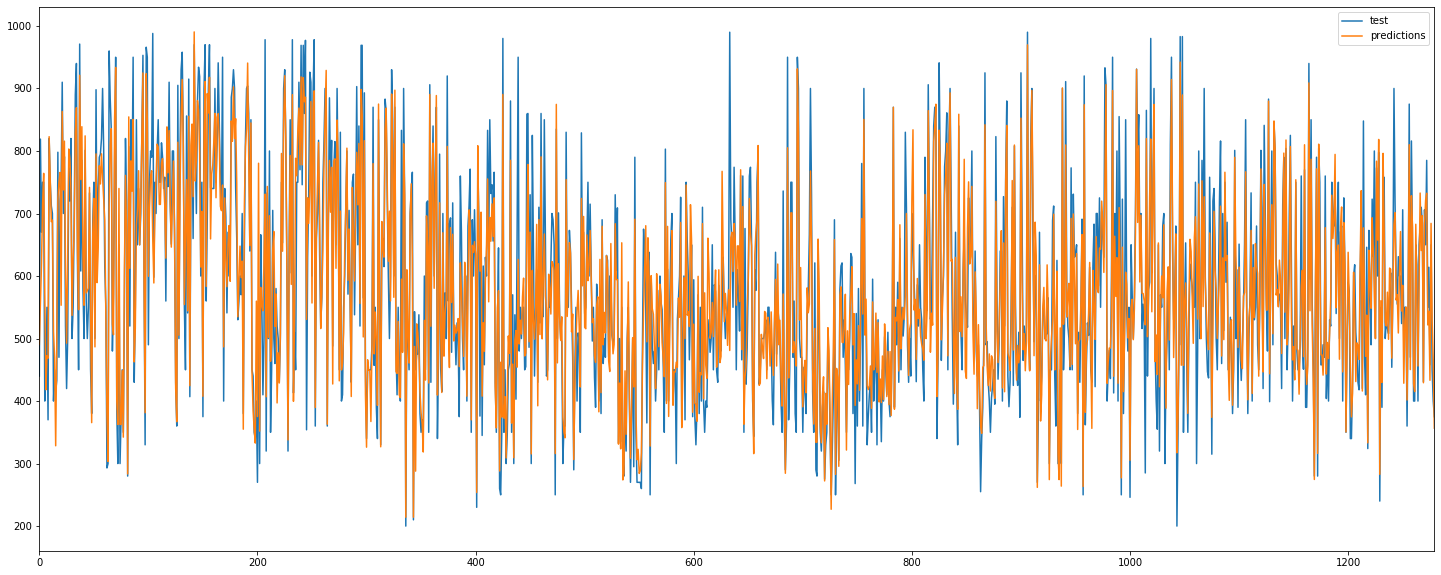

In [218]:
plt = confronto.plot(figsize=(25,10))
fig = plt.get_figure()
fig.savefig("risultato.png")
fig.savefig("risultato.svg")

In [221]:
from scipy.stats.stats import pearsonr

pearsonr(confronto['test'].values, confronto['predictions'].values)

(0.9186010749162692, 0.0)

In [222]:
diff = confronto['test']-confronto['predictions']

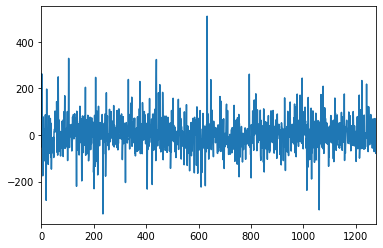

In [223]:
diff.plot()

In [224]:
import pickle

with open('tpot_faster.pickle','wb') as xx:
    pickle.dump(tpot.fitted_pipeline_,xx)

In [18]:
import pickle

with open('tpot_.pickle', 'rb') as xx:
    model = pickle.load(xx)

model.predict(casa)

/home/wonka/.local/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


array([321.7341199])

In [225]:
my_dict = list(tpot.evaluated_individuals_.items())

model_scores = pd.DataFrame()
for model in my_dict:
    model_name = model[0]
    model_info = model[1]
    cv_score = model[1].get('internal_cv_score')  # Pull out cv_score as a column (i.e., sortable)
    model_scores = model_scores.append({'model': model_name,
                                        'cv_score': cv_score,
                                        'model_info': model_info,},
                                       ignore_index=True)

model_scores = model_scores.sort_values('cv_score', ascending=False)

In [226]:
model_scores

,cv_score,model,model_info
693,-1.150253e+04,GradientBoostingRegressor(Normalizer(MinMaxSca...,"{'generation': 'INVALID', 'mutation_count': 30..."
642,-1.150253e+04,GradientBoostingRegressor(MinMaxScaler(MinMaxS...,"{'generation': 'INVALID', 'mutation_count': 29..."
609,-1.150253e+04,GradientBoostingRegressor(MinMaxScaler(MinMaxS...,"{'generation': 'INVALID', 'mutation_count': 23..."
782,-1.150253e+04,GradientBoostingRegressor(Normalizer(MinMaxSca...,"{'generation': 'INVALID', 'mutation_count': 31..."
818,-1.150253e+04,GradientBoostingRegressor(MinMaxScaler(input_m...,"{'generation': 'INVALID', 'mutation_count': 31..."
...,...,...,...
864,-inf,GradientBoostingRegressor(PolynomialFeatures(i...,"{'generation': 'INVALID', 'mutation_count': 5,..."
815,-inf,GradientBoostingRegressor(PolynomialFeatures(M...,"{'generation': 'INVALID', 'mutation_count': 23..."
286,-inf,GradientBoostingRegressor(SelectFromModel(inpu...,"{'generation': 'INVALID', 'mutation_count': 10..."
425,-inf,GradientBoostingRegressor(PolynomialFeatures(i...,"{'generation': 'INVALID', 'mutation_count': 6,..."


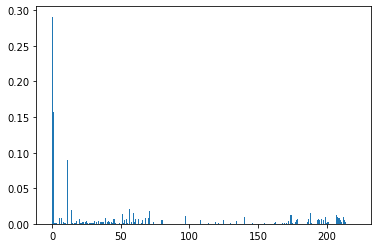

In [246]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]
exctracted_best_model.feature_importances_
positions= range(exctracted_best_model.feature_importances_.shape[0])
plot.bar(positions, exctracted_best_model.feature_importances_)
plot.show()

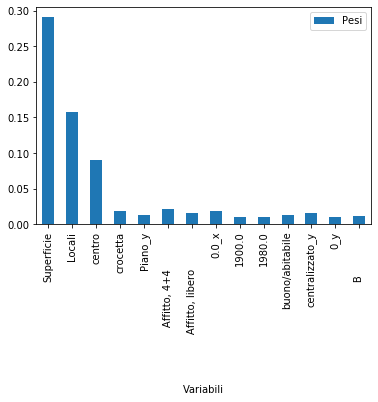

In [251]:
most_valuable_features=pd.DataFrame(columns=['Variabili', 'Pesi'])
most_valuable_features['Variabili'] = dati.columns.astype(str)
most_valuable_features['Pesi'] = exctracted_best_model.feature_importances_
most_valuable_features.set_index('Variabili', inplace=True)
most_valuable_features[most_valuable_features['Pesi']>0.01].plot(kind='bar')#(dati.columns.astype(str),exctracted_best_model.feature_importances_[exctracted_best_model.feature_importances_ > 0.01])

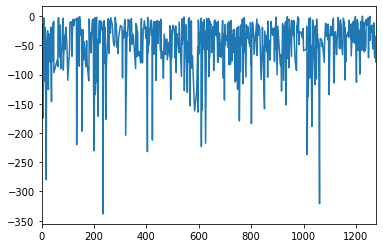

In [234]:
diff[diff<0].plot()

In [250]:
most_valuable_features

,Variabili,Pesi
0,Superficie,0.290967
1,Locali,0.157526
2,aurora,0.000448
3,barca,0.000719
4,barriera-di-lanzo,0.000342
...,...,...
217,"212,00 kWh/m²a",0.000000
218,"245,00 kWh/m²a",0.000000
219,"274,00 kWh/m²a",0.000000
220,"750,00 kWh/m²a",0.000000


## AUTOML

In [18]:
from sklearn.model_selection import train_test_split
from auto_ml import Predictor
from auto_ml.utils import get_boston_dataset
from auto_ml.utils_models import load_ml_model
from sklearn.model_selection import train_test_split
import pandas as pd


dataset = pd.read_csv('dataset_allenamento.csv', sep=";")
dataset.drop(columns='Unnamed: 0', inplace=True)
dataset.fillna(0, inplace=True)

dataset['Price'] = (dataset['Prezzo'].astype(int) + dataset['Spese condominio'].astype(int) + dataset['Spese riscaldamento'].astype(int))
dataset['Locali'] = dataset['Locali'].astype(int)
dataset = dataset[dataset['Price']<1000]
dati = dataset.drop(columns= ['Prezzo','Spese condominio', 'Spese riscaldamento'])

column_descriptions = {
    'Price': 'output',
    'Zona':'categorical',
    'Piano':'categorical',
    'Contratto':'categorical',
    'Tipologia':'categorical',
    'Tipo proprietà':'categorical',
    'Anno di costruzione':'categorical',
    'Stato':'categorical',
    'Riscaldamento':'categorical',
    'Climatizzatore':'categorical',
    'Classe energetica':'categorical'
}

df_train, df_test = train_test_split(dati,train_size=0.75, test_size=0.25)

ml_predictor = Predictor(type_of_estimator='regressor', column_descriptions=column_descriptions)

ml_predictor.train(df_train)

# Score the model on test data
test_score = ml_predictor.score(df_test, df_test.Price)
test_modello = ml_predictor.save()
trained_model = load_ml_model(test_modello)

predictions = trained_model.predict(df_test)
print(predictions)

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.10
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingRegressor to predict Price
Started at:
201

In [19]:
valutazione = pd.DataFrame()
ground_truth = dati['Price'].values
predictions = trained_model.predict(dati)
valutazione['Reale'] = ground_truth
valutazione['predictions'] = predictions

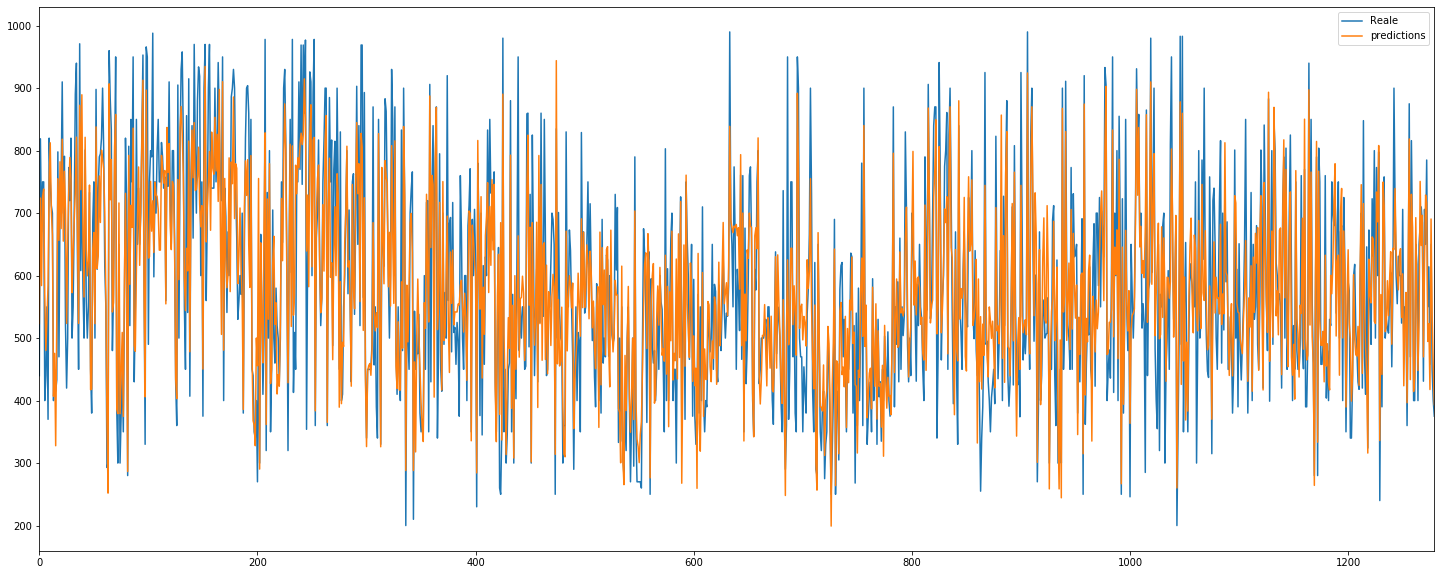

In [20]:
import matplotlib.pyplot as plot
plt = valutazione.plot(figsize=(25,10))
fig = plt.get_figure()
fig.savefig("risultato_automl.png")
fig.savefig("risultato_automl.svg")

In [21]:
from scipy.stats.stats import pearsonr

pearsonr(valutazione['Reale'].values, valutazione['predictions'].values)

(0.8650422181110186, 0.0)

89.12339907091929


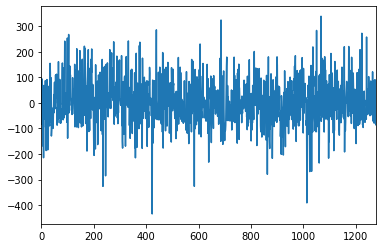

In [22]:
diff = valutazione['Reale']-valutazione['predictions']
print(diff.std())
diff.plot()

In [24]:
trained_model.predict(casa)

371.7838807180993